In [1]:

!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/40/ad/c22887189c23cc133ae7cbad48c71312f1a962b960fe7f51fd792808a307/wordcloud-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 257.6 kB/s eta 0:00:00m eta 0:00:010:00:01


In [1]:
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/vini/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/vini/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/vini/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
corpus = """The beneficiaries of the Women AI and Data Academy program are Amazons. 
They are currently learning data visualization, machine learning, deep learning, 
web scraping, as well as all the concepts of data and AI. 
They are gaining knowledge of the complete functioning of algorithms, 
from understanding the algorithms to implementing models, 
taking into account data retrieval, storage, and streaming for BI purposes."""

In [4]:
corpus = corpus.lower()

In [5]:
corpus

'the beneficiaries of the women ai and data academy program are amazons. \nthey are currently learning data visualization, machine learning, deep learning, \nweb scraping, as well as all the concepts of data and ai. \nthey are gaining knowledge of the complete functioning of algorithms, \nfrom understanding the algorithms to implementing models, \ntaking into account data retrieval, storage, and streaming for bi purposes.'

In [6]:
corpus = corpus.replace(".",' ').replace(","," ").replace('\n'," ").replace("  "," ").replace("   "," ")

In [7]:
corpus

'the beneficiaries of the women ai and data academy program are amazons  they are currently learning data visualization machine learning deep learning  web scraping as well as all the concepts of data and ai  they are gaining knowledge of the complete functioning of algorithms  from understanding the algorithms to implementing models  taking into account data retrieval storage and streaming for bi purposes '

In [8]:
stop_w = stopwords.words("english")

In [9]:
stop_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
tokens = word_tokenize(corpus)

In [11]:
tokens

['the',
 'beneficiaries',
 'of',
 'the',
 'women',
 'ai',
 'and',
 'data',
 'academy',
 'program',
 'are',
 'amazons',
 'they',
 'are',
 'currently',
 'learning',
 'data',
 'visualization',
 'machine',
 'learning',
 'deep',
 'learning',
 'web',
 'scraping',
 'as',
 'well',
 'as',
 'all',
 'the',
 'concepts',
 'of',
 'data',
 'and',
 'ai',
 'they',
 'are',
 'gaining',
 'knowledge',
 'of',
 'the',
 'complete',
 'functioning',
 'of',
 'algorithms',
 'from',
 'understanding',
 'the',
 'algorithms',
 'to',
 'implementing',
 'models',
 'taking',
 'into',
 'account',
 'data',
 'retrieval',
 'storage',
 'and',
 'streaming',
 'for',
 'bi',
 'purposes']

In [12]:
stop_w_corpus = [ elt for elt in tokens if elt in stop_w]

In [13]:
tokens = [ elt for elt in tokens if elt not in stop_w]

In [14]:
tokens

['beneficiaries',
 'women',
 'ai',
 'data',
 'academy',
 'program',
 'amazons',
 'currently',
 'learning',
 'data',
 'visualization',
 'machine',
 'learning',
 'deep',
 'learning',
 'web',
 'scraping',
 'well',
 'concepts',
 'data',
 'ai',
 'gaining',
 'knowledge',
 'complete',
 'functioning',
 'algorithms',
 'understanding',
 'algorithms',
 'implementing',
 'models',
 'taking',
 'account',
 'data',
 'retrieval',
 'storage',
 'streaming',
 'bi',
 'purposes']

In [15]:
stop_w_corpus

['the',
 'of',
 'the',
 'and',
 'are',
 'they',
 'are',
 'as',
 'as',
 'all',
 'the',
 'of',
 'and',
 'they',
 'are',
 'of',
 'the',
 'of',
 'from',
 'the',
 'to',
 'into',
 'and',
 'for']

In [16]:
lemmatizer =  PorterStemmer()
tokens = [PorterStemmer().stem(token) for token in tokens]

### tokens

In [17]:
dict_infos={k:tokens.count(k) for k in tokens}

In [18]:
dict_infos

{'beneficiari': 1,
 'women': 1,
 'ai': 2,
 'data': 4,
 'academi': 1,
 'program': 1,
 'amazon': 1,
 'current': 1,
 'learn': 3,
 'visual': 1,
 'machin': 1,
 'deep': 1,
 'web': 1,
 'scrape': 1,
 'well': 1,
 'concept': 1,
 'gain': 1,
 'knowledg': 1,
 'complet': 1,
 'function': 1,
 'algorithm': 2,
 'understand': 1,
 'implement': 1,
 'model': 1,
 'take': 1,
 'account': 1,
 'retriev': 1,
 'storag': 1,
 'stream': 1,
 'bi': 1,
 'purpos': 1}

In [19]:
data = pd.DataFrame([dict_infos])
data

,beneficiari,women,ai,data,academi,program,amazon,current,learn,visual,...,understand,implement,model,take,account,retriev,storag,stream,bi,purpos
0,1,1,2,4,1,1,1,1,3,1,...,1,1,1,1,1,1,1,1,1,1


In [20]:
data.T.reset_index()

,index,0
0,beneficiari,1
1,women,1
2,ai,2
3,data,4
4,academi,1
5,program,1
6,amazon,1
7,current,1
8,learn,3
9,visual,1


In [21]:
def get_stem (word):
    stemmer = PorterStemmer()
    return [PorterStemmer().stem(word) for tokens in word]

In [22]:
get_stem("learning")

['learn', 'learn', 'learn', 'learn', 'learn', 'learn', 'learn', 'learn']

In [23]:
def get_lemme(word):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(word)

In [24]:
get_lemme("learning")

'learning'

In [25]:
wordcloud = WordCloud().generate(" ".join(tokens))

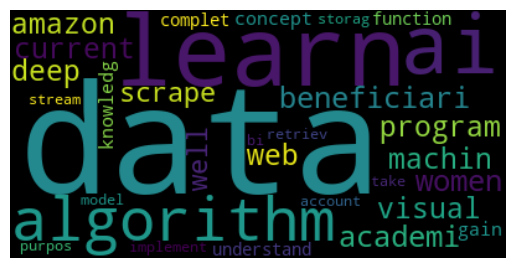

In [26]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
tf_scores = dict_infos.copy()
idf_scores = {token :1 for token in tokens}

In [28]:
tfidf_scores = {token:tf_scores[token]*idf_scores[token] for token in tokens}

In [29]:
tfidf_scores

{'beneficiari': 1,
 'women': 1,
 'ai': 2,
 'data': 4,
 'academi': 1,
 'program': 1,
 'amazon': 1,
 'current': 1,
 'learn': 3,
 'visual': 1,
 'machin': 1,
 'deep': 1,
 'web': 1,
 'scrape': 1,
 'well': 1,
 'concept': 1,
 'gain': 1,
 'knowledg': 1,
 'complet': 1,
 'function': 1,
 'algorithm': 2,
 'understand': 1,
 'implement': 1,
 'model': 1,
 'take': 1,
 'account': 1,
 'retriev': 1,
 'storag': 1,
 'stream': 1,
 'bi': 1,
 'purpos': 1}

In [31]:
# Day 3( Tue,Feb 6)

In [41]:
phrase1= "Je suis Vini SENAKPON MIGAN,j'ai étudié la Robotique.Actuellement je suis une formation en Data Science & IA. Je désire vraiment intégrer l'IA en dans le domaine de la communication.Je serai un Data Analyste & IA. With this ideas i would like to help the valorisation of languages using data science. In my country we need Data scientist and IA.I'm currently learning data visualization,machine learning, deep learning" 
phrase2= "j'ai un projet de développement basé sur la technologie agricole"
phrase3= " Je parle l'anglais et le japonais. Je pourrai traduire de francais vers l'anglais et du japonais vers le fongbé"

In [42]:
token_1 = phrase1.split()
token_1

['Je',
 'suis',
 'Vini',
 'SENAKPON',
 "MIGAN,j'ai",
 'étudié',
 'la',
 'Robotique.Actuellement',
 'je',
 'suis',
 'une',
 'formation',
 'en',
 'Data',
 'Science',
 '&',
 'IA.',
 'Je',
 'désire',
 'vraiment',
 'intégrer',
 "l'IA",
 'en',
 'dans',
 'le',
 'domaine',
 'de',
 'la',
 'communication.Je',
 'serai',
 'un',
 'Data',
 'Analyste',
 '&',
 'IA.',
 'With',
 'this',
 'ideas',
 'i',
 'would',
 'like',
 'to',
 'help',
 'the',
 'valorisation',
 'of',
 'languages',
 'using',
 'data',
 'science.',
 'In',
 'my',
 'country',
 'we',
 'need',
 'Data',
 'scientist',
 'and',
 "IA.I'm",
 'currently',
 'learning',
 'data',
 'visualization,machine',
 'learning,',
 'deep',
 'learning']

In [43]:
token_2=phrase2.split()

In [44]:
token_1.extend(phrase2.split())

In [45]:
token_2.extend(phrase3.split())

In [46]:
token_2 = list(set([elt for elt in phrase1.split() +  phrase2.split() +  phrase3.split()]))
token_2

['i',
 'In',
 'vraiment',
 'would',
 "IA.I'm",
 'Analyste',
 'using',
 'le',
 'languages',
 'technologie',
 'japonais',
 'Robotique.Actuellement',
 'and',
 'learning',
 'un',
 'fongbé',
 "l'IA",
 'scientist',
 'désire',
 'basé',
 'vers',
 '&',
 'Vini',
 'communication.Je',
 'we',
 'SENAKPON',
 'science.',
 'japonais.',
 'sur',
 'une',
 'de',
 'visualization,machine',
 'je',
 'parle',
 'francais',
 'of',
 'Je',
 'With',
 'learning,',
 'the',
 'formation',
 "MIGAN,j'ai",
 'serai',
 'traduire',
 'deep',
 'projet',
 'pourrai',
 'dans',
 'agricole',
 'ideas',
 "l'anglais",
 'this',
 'la',
 'étudié',
 'Science',
 'domaine',
 'help',
 'valorisation',
 'data',
 'need',
 'Data',
 'IA.',
 'like',
 'currently',
 'développement',
 'my',
 'et',
 'country',
 'to',
 'du',
 'intégrer',
 'suis',
 "j'ai",
 'en']

In [47]:
vec_1=[phrase1.count(elt) for elt in token_2]
vec_1

[34,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 0,
 0,
 1,
 1,
 3,
 4,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 8]

In [48]:
# Une fonction ou on donne juste une phrase pour faire les vecteurs
def vectorize_sentence(sentence):
    return [sentence.count(elt) for elt in token_2]

In [49]:
vectorize_sentence(phrase3)

[7,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0]

In [50]:
def vectorize_sentence(sentence,tokens) :
    return [sentence.count(elt) for elt in token_2]


In [51]:
vect_1 =  vectorize_sentence(phrase1,token_2)
vect_1

[34,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 0,
 0,
 1,
 1,
 3,
 4,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 1,
 0,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 8]

In [52]:
phrase2.count("d")

2

In [53]:
vect_2 =  vectorize_sentence(phrase2,token_2)
vect_2

[3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1]

In [54]:
vect_3 =  vectorize_sentence(phrase3,token_2)
vect_3

[7,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0]

In [55]:
import pandas as pd 
data = pd.DataFrame([vect_1,vect_2,vect_3],columns=token_2,index=["phrase1","phrase2","phrase3"])
data

,i,In,vraiment,would,IA.I'm,Analyste,using,le,languages,technologie,...,développement,my,et,country,to,du,intégrer,suis,j'ai,en
phrase1,34,1,1,1,1,1,1,5,1,0,...,0,1,0,1,1,0,1,2,1,8
phrase2,3,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,0,1,1
phrase3,7,0,0,0,0,0,0,3,0,0,...,0,0,2,0,0,2,0,0,0,0


### Frequence relative de chaque mot (Term frequency)

#### NB: Ici une phrase constitue un doc

In [56]:
"Vini" in phrase1

True

In [57]:
'data' in phrase3

False

In [58]:
int('Vini'in phrase1)

1

In [59]:
'agricole'in phrase3 + "Vini"in phrase1+ "SENAKPON" in phrase1

False

In [60]:
idf=[((elt in phrase1)+(elt in phrase2)+(elt in phrase3))/3 for elt in token_2] # Nbre total de phrases=3
idf

[1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 1.0,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.6666666666666666,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333

In [61]:
idf=pd.DataFrame([idf],columns=token_2,index =['idf'])
idf

,i,In,vraiment,would,IA.I'm,Analyste,using,le,languages,technologie,...,développement,my,et,country,to,du,intégrer,suis,j'ai,en
idf,1.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.333333,0.333333,...,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667


In [62]:
tf=[phrase1.split().count(elt)+phrase2.split().count(elt)+phrase3.split().count(elt) for elt in token_2]
tf

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2]

In [63]:
tf1= pd.DataFrame([tf],columns=token_2, index=['tf'])
tf1

,i,In,vraiment,would,IA.I'm,Analyste,using,le,languages,technologie,...,développement,my,et,country,to,du,intégrer,suis,j'ai,en
tf,1,1,1,1,1,1,1,3,1,1,...,1,1,2,1,1,1,1,2,1,2


In [64]:
score=pd.concat([tf1,idf])
score

,i,In,vraiment,would,IA.I'm,Analyste,using,le,languages,technologie,...,développement,my,et,country,to,du,intégrer,suis,j'ai,en
tf,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
idf,1.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.333333,0.333333,...,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667


In [65]:
f= lambda x :x[0]+ x[1]

In [66]:
tf_idf= score.apply(f, axis=0)
tf_idf

i           2.000000
In          1.333333
vraiment    1.333333
would       1.333333
IA.I'm      1.333333
              ...   
du          1.333333
intégrer    1.333333
suis        2.333333
j'ai        1.666667
en          2.666667
Length: 74, dtype: float64

In [67]:
tf_idf= pd.DataFrame(tf_idf, columns=['tf-idf'])
tf_idf

,tf-idf
i,2.000000
In,1.333333
vraiment,1.333333
would,1.333333
IA.I'm,1.333333
...,...
du,1.333333
intégrer,1.333333
suis,2.333333
j'ai,1.666667


In [68]:
tf_idf_score=pd.concat([score, tf_idf.T])
tf_idf_score

,i,In,vraiment,would,IA.I'm,Analyste,using,le,languages,technologie,...,développement,my,et,country,to,du,intégrer,suis,j'ai,en
tf,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
idf,1.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,1.0,0.333333,0.333333,...,0.333333,0.333333,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.666667
tf-idf,2.0,1.333333,1.333333,1.333333,1.333333,1.333333,1.333333,4.0,1.333333,1.333333,...,1.333333,1.333333,2.666667,1.333333,1.333333,1.333333,1.333333,2.333333,1.666667,2.666667


In [69]:
wordcloud = WordCloud().generate(" ".join(token_2))

In [70]:
# Fonction pour générer le word cloud
def generer_wordcloud(phrase):
    tout_texte = ' '.join(phrase)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title("Phrases", fontsize=14)
    plt.axis('off')
    plt.show()

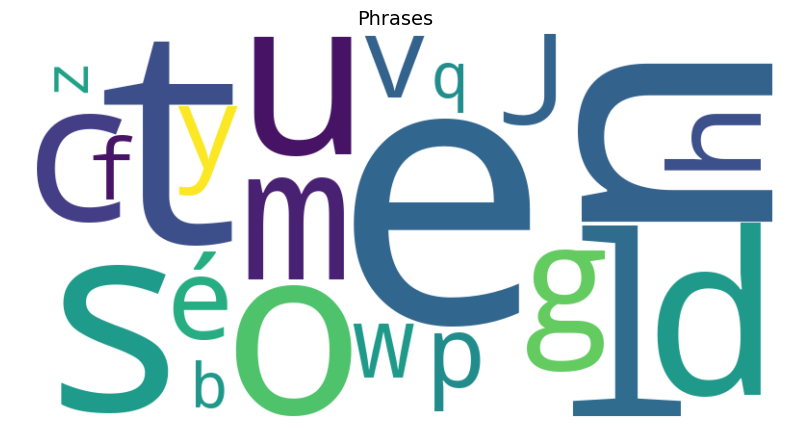

In [71]:
generer_wordcloud(phrase1)

### Produit scalaire(u,v)
##### u.v= ||U||.||V||.cos(u.v)
##### cos(u,v)=u.v/||U||.||V||

In [73]:
def cosinus(u,v):
    u_norm= np.linalg.norm(u)
    v_norm=np.linalg.norm(v)
    u_scalar_v=np.dot(u,v)
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [74]:
arr1=np.array([1,3,2])
arr2=np.array([-5,0,1])

In [75]:
np.dot(arr1,arr2)

-3

In [77]:
cosinus(arr1,arr2)

-0.15724272550828775

In [84]:
import math
def scalar(u,v):
    return sum([elt1*elt2  for elt1,elt2 in zip(u,v)])
def get_norm(u):
    return math.sqrt(sum([elt**2 for elt in u]))

In [80]:
scalar(arr1,arr2)

-3

In [81]:
np.linalg.norm(arr1)

3.7416573867739413

In [82]:
np.sqrt(14)

3.7416573867739413

In [85]:
get_norm(arr1)

3.7416573867739413

In [86]:
cosinus( vect_1,vect_2)

0.7151894107096806

##### NB
##### -Cette technique de nip permet de comprendre le thème d'un text donné sur la base du Wordcloud sans forcément le lire 
##### -Elle permet également de détecter le sentiment sur la base des mots fréquents présentsdans le corpus
##### -Permet d'attribuer par la suite . Chaque mot a une classe données pour faire des recherches avancées après